# trim_extrema

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
ps.visualization.set_mpl_style()

## Create image and variables:

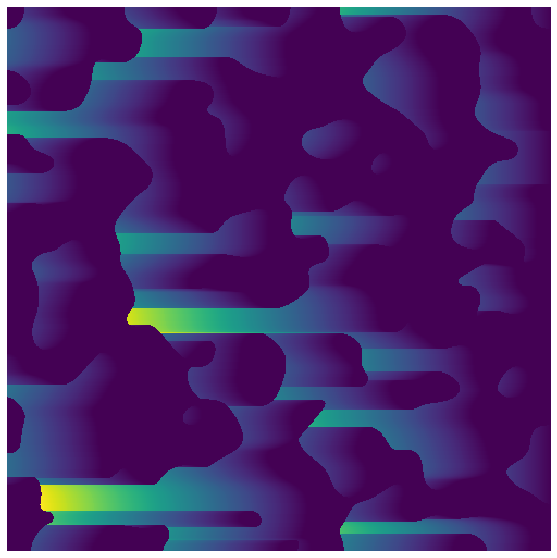

In [2]:
im = ps.generators.blobs(shape=[500, 500])
im = ps.filters.distance_transform_lin(im, axis = 1, mode = "reverse")
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)
h = 25

#default values:
mode="maxima"

## Apply filter function:
With different parameters

### h

Text(0.5, 1.0, 'h = 10')

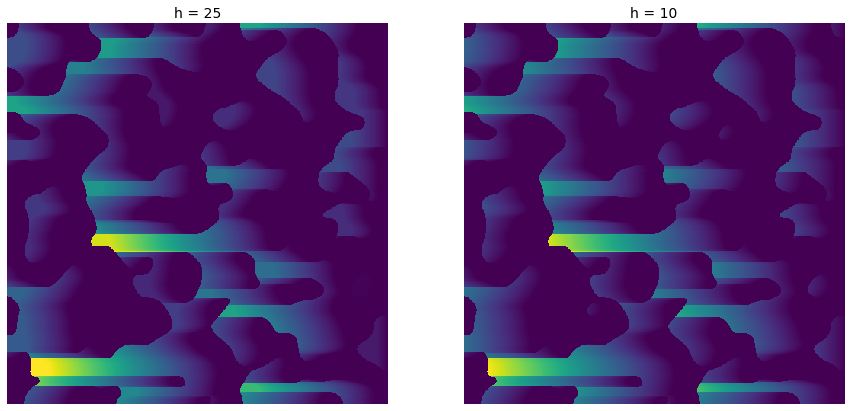

In [3]:
x = ps.filters.trim_extrema(im=im, h=h, mode=mode)
xx = ps.filters.trim_extrema(im=im, h=0, mode=mode)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('h = 25')
ax[1].set_title('h = 10')

### mode
options are maxima, minima, and extrema

True


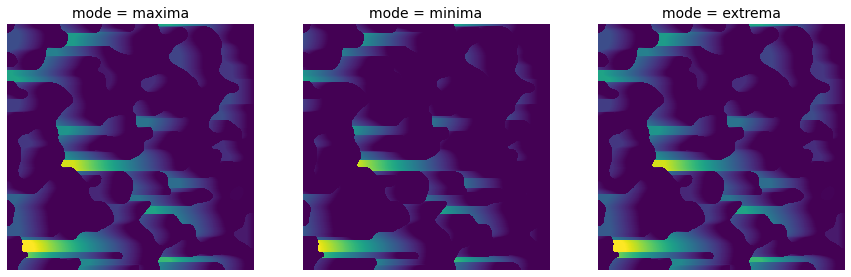

In [4]:
x = ps.filters.trim_extrema(im=im, h=h, mode= 'maxima')
xx = ps.filters.trim_extrema(im=im, h=h, mode= 'minima')
xxx = ps.filters.trim_extrema(im=im, h=h, mode='extrema')

fig, ax = plt.subplots(1, 3, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[2].imshow(xxx);
ax[0].axis(False)
ax[1].axis(False)
ax[2].axis(False)
ax[0].set_title('mode = maxima')
ax[1].set_title('mode = minima')
ax[2].set_title('mode = extrema')